In [23]:
import os
import rasterio
from rasterio.plot import show
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2


C:\Users\divyansh.singh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\rasterio\__init__.py:368: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


Matadata {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 2592, 'height': 1944, 'count': 1, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}
Band 1


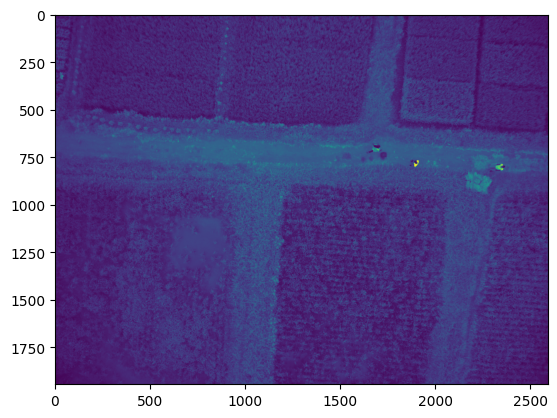

Image shape (1, 1944, 2592)


In [12]:
images_path = r"C:\Users\divyansh.singh\Desktop\CFICAN\DJI_20230814123320_0001_MS_G.TIF"

# Open and visualize the images 
with rasterio.open(images_path) as src:
    print("Matadata", src.meta)
    print("Band",src.count)
    image = src.read()
    show(src)
    
    
print("Image shape", image.shape)

In [ ]:
# load all bands images
images_path1 = [
    "Dron_images\DJI_20230814123320_0001_MS_R.TIF",
    "Dron_images\DJI_20230814123320_0001_MS_G.TIF",
    "Dron_images\DJI_20230814123320_0001_MS_RE.TIF",
    "Dron_images\DJI_20230814123320_0001_MS_NIR.TIF"
]


bands = []
for images_path1 in images_path1:
    with rasterio.open(images_path1) as src:
        band = src.read(1)
        bands.append(band)
        print("Band",src.count)


# converted to numpy array
stacked_images = np.stack(bands, axis=0)
print("Imgaes shape",stacked_images.shape)

Band 1
Band 1
Band 1
Band 1
Imgaes shape (4, 1944, 2592)


C:\Users\divyansh.singh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\rasterio\__init__.py:368: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


##  Normalize Image Bands

#### Normalize the pixel values (0-1 scale) for better proce

In [20]:
# Normalize Images Band
def normalize_band(band):
    return (band - np.min(band)) / (np.max(band) - np.min(band))


normalized_band = [normalize_band(band) for band in stacked_images]

normalized_images = np.stack(normalized_band,axis = 0)
print("Normalization complete!")

Normalization complete!


## Compute Vegetation Index (NDVI)

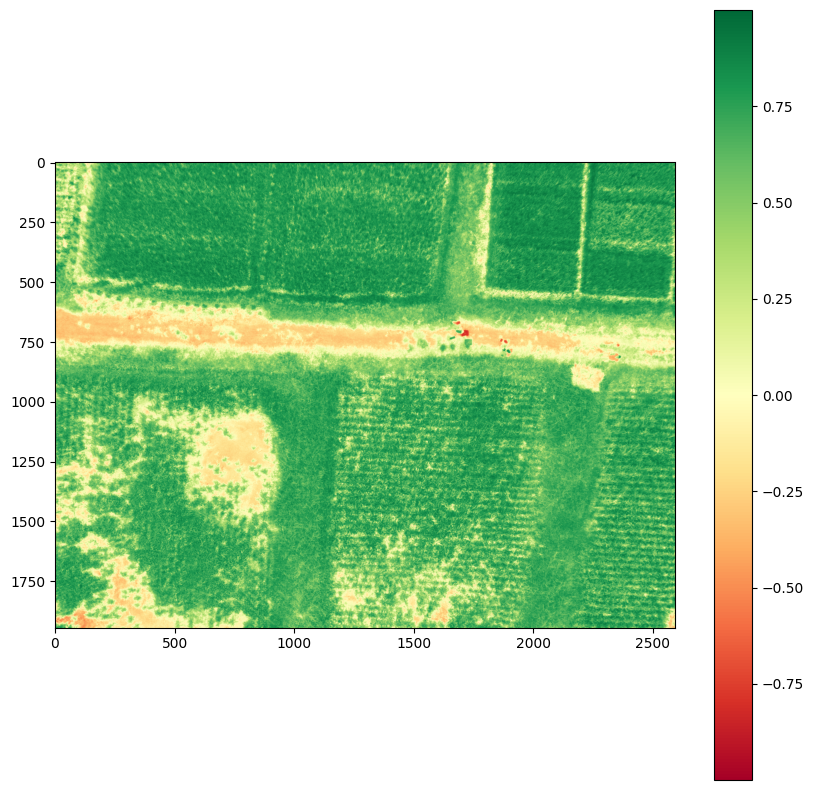

In [22]:
# Compute Vegetation index (NDVi)
def compute_ndvi(nir_band,red_band):
    ndvi = (nir_band - red_band) / (nir_band + red_band + 1e-6)
    return ndvi

ndvi = compute_ndvi(normalized_images[3],normalized_images[0])

# show Ndvi 
plt.figure(figsize=(10,10))
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar()

## Image Enhancement & Filterin

#### Apply Gaussian blur and Contrast Stretching for better visualization.

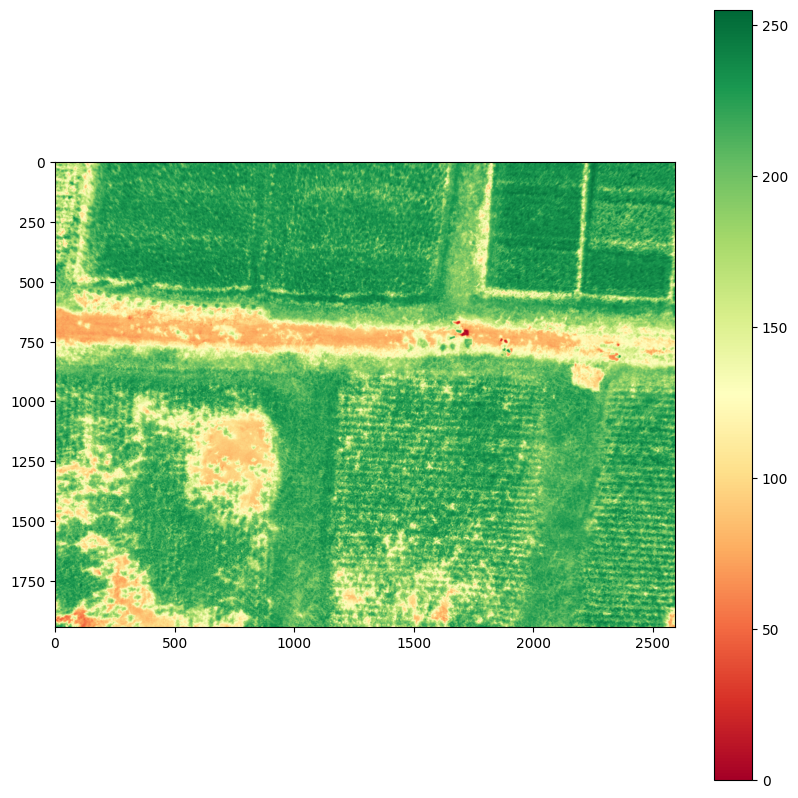

In [ ]:

def enhance_images(image):
    blured = cv2.GaussianBlur(image,(5,5),0)
    stretched = cv2.normalize(blured,None,0,255,cv2.NORM_MINMAX)
    return stretched

ndvi_enhanced = enhance_images(ndvi)

# Images show
plt.figure(figsize=(10,10))
plt.imshow(ndvi_enhanced,cmap='RdYlGn')
plt.colorbar()
plt.show()

###  Edge Detection (Pest/Disease Analysis)

#### Using Canny Edge Detection to highlight boundaries.

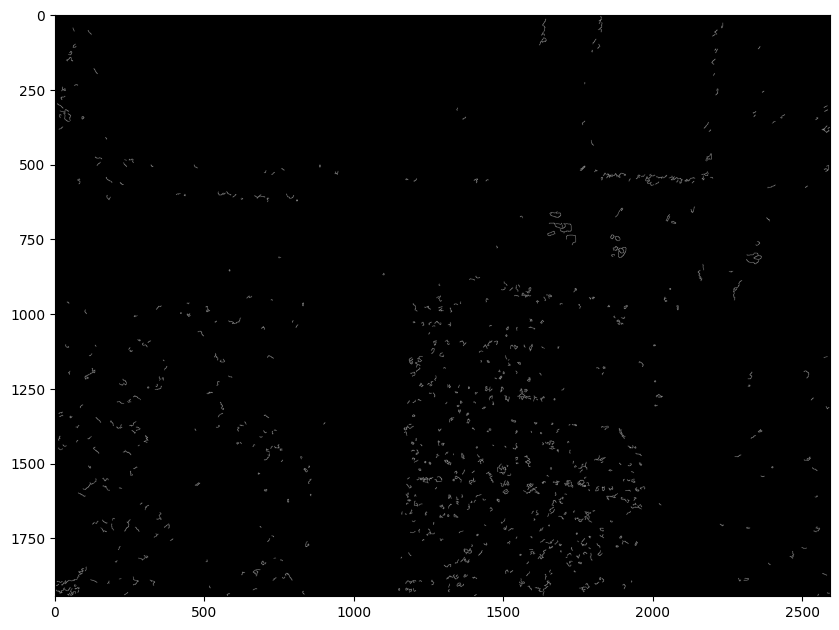

In [ ]:
edge = cv2.Canny(np.uint8(ndvi_enhanced),100,200)
plt.figure(figsize=(10,10))
plt.imshow(edge,cmap='gray')
plt.show()

## Apply Dilation to Strengthen Edges

#### Dilation helps connect broken edges and highlight pest-infes

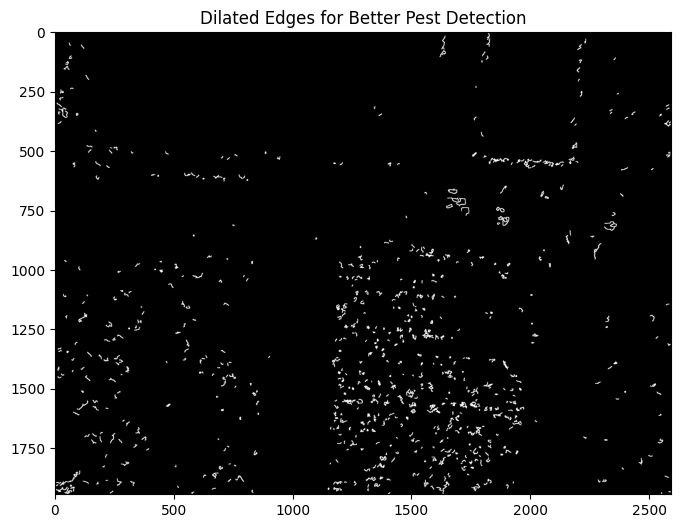

In [31]:
kernel = np.ones((3,3), np.uint8)
dilated_edges = cv2.dilate(edge, kernel, iterations=1)

plt.figure(figsize=(10, 6))
plt.imshow(dilated_edges, cmap='gray')
plt.title("Dilated Edges for Better Pest Detection")
plt.show()


In [39]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# import rasterio

# # Load the drone image
# image_path = r"C:\Users\divyansh.singh\Desktop\CFICAN\DJI_20230814123320_0001_D.JPG"
# image = cv2.imread(image_path)
# image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

# # Convert to HSV for color-based segmentation
# hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# lower_green = np.array([25, 40, 40])  # Adjust based on dataset
# upper_green = np.array([90, 255, 255])  # Higher range for green

# # Mask unhealthy/stressed vegetation
# mask = cv2.inRange(hsv, lower_green, upper_green)
# pest_regions = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

# # Apply Edge Detection (Canny)
# edges = cv2.Canny(mask, 50, 150)

# # Display results
# fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# # Original Image
# ax[0].imshow(image_rgb)
# ax[0].set_title("Original Drone Image")
# ax[0].axis("off")

# # Pest-Affected Areas (Color Segmentation)
# ax[1].imshow(pest_regions)
# ax[1].set_title("Pest-Affected Areas (Color Segmentation)")
# ax[1].axis("off")

# # Edge Detection
# ax[2].imshow(edges, cmap="gray")
# ax[2].set_title("Edge Detection for Pest Detection")
# ax[2].axis("off")

# plt.show()
